In [0]:
%matplotlib inline
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

In [11]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , x_train.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", y_train.shape)

Image Data Shape (60000, 28, 28)
Label Data Shape (60000,)


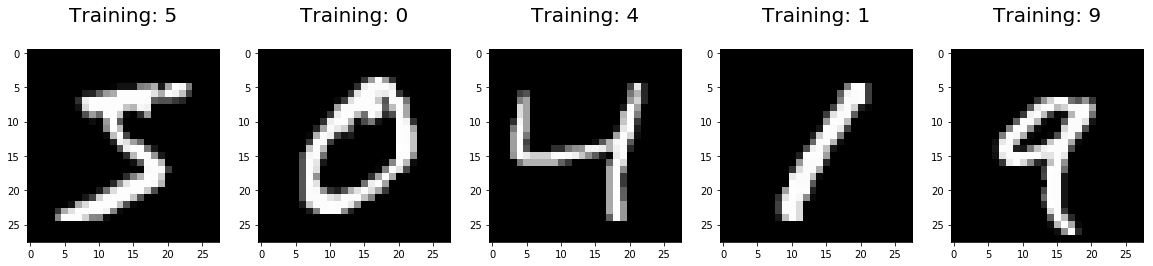

In [12]:
import numpy as np 
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [13]:
print(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])


60000 784


In [0]:
def logisticModel(solver = 'lbfgs',multi_class = 'auto' , max_iter  =100, C = 1.0,verbose = 1):
    logisticRegr = LogisticRegression(solver = solver,multi_class = 'ovr',max_iter  = max_iter,C=C,verbose = 1)
    return logisticRegr

In [0]:
logisticRegr = logisticModel()
logisticRegr.fit(x_train,y_train)
y_pred = logisticRegr.predict(x_test)

score = logisticRegr.score(x_train,y_train)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Incr

Accuracy: 0.9178
0.9261166666666667


In [18]:
iters = [50,100,200,300,400,500]
ans=[]
ans2 = []
print (iters)
for x in iters:
    logisticRegr = logisticModel(max_iter = x)
    logisticRegr.fit(x_train, y_train)
    score = logisticRegr.score(x_test, y_test)
    ans.append(score)
print(ans)

[50, 100, 200, 300, 400, 500]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Incr

[0.9181, 0.9178, 0.9179, 0.9186, 0.9178, 0.9185]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  6.8min finished


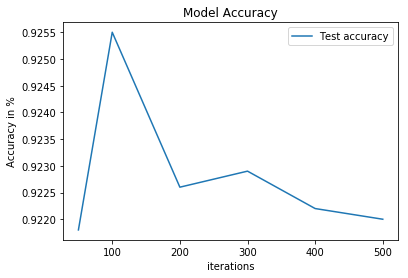

In [16]:
plt.plot(iters,ans)
legend = [];
legend.append('Test accuracy')
plt.xlabel('iterations')
plt.ylabel('Accuracy in %')
plt.title('Model Accuracy')
plt.legend(legend, loc='best')
